 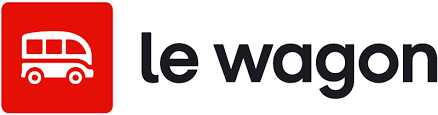

# Orders clustering

The purpose of the exercise is to extract different "typical profiles" of orders and consumers from Greenweez's turnover data. To achieve this, we will apply unsupervised learning algorithms to create order clusters.

## Orders clustering

a) Execute the cell below to load  the data into a `df` variable.

It will select 50k orders randomly (`ORDER BY rand()` in the SQL query).

In [ ]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

<ipython-input-3-40120a5a6a92>:13: FutureWarning: read_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.read_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.read_gbq
  df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")


,turnover_grocery,turnover_beauty,turnover_baby,turnover_home,turnover_fresh,promo_rate
0,0.00,43.41,0.00,0.00,0.0,NaN
1,0.00,13.86,64.22,0.00,0.0,NaN
2,61.17,20.25,0.00,6.42,0.0,0.004064
3,83.10,0.00,0.00,0.00,0.0,NaN
4,39.06,0.00,0.00,0.00,0.0,0.018548


b) Which features do you see?

In [ ]:
# your code here
#columns 1 - 6

Are there any null values?

In [ ]:
# your code here
#yes

c) Replace null values (if any exist) with 0 using `fillna()`

In [ ]:
# your code here
df['promo_rate'] = df['promo_rate'].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   turnover_grocery  50000 non-null  float64
 1   turnover_beauty   50000 non-null  float64
 2   turnover_baby     50000 non-null  float64
 3   turnover_home     50000 non-null  float64
 4   turnover_fresh    50000 non-null  float64
 5   promo_rate        50000 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


In [ ]:
# your code here

d) In a variable called `df_orders`, keep all the turnover columns from the original df. These features will help us cluster orders.

In [ ]:
# your code here
df_orders = df[['turnover_grocery', 'turnover_beauty', 'turnover_baby', 'turnover_home', 'turnover_fresh']]

e) Use plotly.express and a box chart to see if the distribution of turnover is different per category (i.e. feature).

In [ ]:
# your code here
import plotly.express as px

In [ ]:
px.box(df_orders, x='turnover_beauty',y='turnover_baby') #,color='turnover_grocery'

f) Most entries for the column 'turnover_fresh' do not differ from zero, it seems like people are not purchasing these products enough to conduct a meaningful analysis.

Delete the `turnover_fresh` column from `df_orders`.

In [ ]:
# your code here
df_orders = df[['turnover_grocery', 'turnover_beauty', 'turnover_baby', 'turnover_home']]

g) Train a first kmeans algorithm with two a-priori clusters. Remember that distance based models, such as k-means, are greatly effected by scale. Be sure to standardize your data appropriately.


In [ ]:
#scale data here

In [ ]:
# your code here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(df_orders)

KMeans(n_clusters=2)

In [ ]:
kmeans_pred = kmeans.labels_

h) What is inertia for a clustering algorithm? What is inertia for this model?

In [ ]:
# your code here
kmeans.inertia_

174767343.30233037

In [ ]:
kmeans.cluster_centers_

array([[ 8.31400194, 19.79835211, 23.87671418, 13.40465674],
       [84.73871663, 12.39322237,  2.99661457,  5.8240926 ]])

i) How do we know if 2 clusters a priori was a good choice or not?
Which method could you use?

The elbow method will allow of to check inertias with differing numbers of starting clusters.

j) You will use elbow method.

You will need to loop over different values of  𝑘  (in range 1 to 10) and stores the inertia at each iteration in order to plot its evolution and select the best  𝑘.

Complete code below to do so.

In [ ]:
inertias = []
n_k = range(1, 11)

# for each number of centroids
for k in n_k:
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(df_orders)
  inertias.append(kmeans.inertia_)

inertias

    # your code here

[232487871.47816232,
 172470164.41411418,
 122463684.28134942,
 107758624.74549863,
 95149404.76484191,
 76528178.69596837,
 65779411.813657366,
 58545185.11055777,
 53548782.86633016,
 49521267.19579391]

k) Use plotly.express to display a line chart of all inertias.

Which number of cluster you recommend and why?

In [ ]:
# your code here
px.line(x=n_k,y=inertias)

<details>
    <summary><i>Solution</i></summary>

It seems like the largest decreases in inertia occur from 1 -> 2 centroids and then 2 -> 3 centroids. Accordingly, choosing 3 centroids seems like a sensible place to start.
</details>

l) Train a new model with 3 clusters a priori. Use parameter n_init=100 to select best model among 100 tries.

Use `predict()` method to predict in which cluster each row of `df_orders` belong to. We will store results in a `labels` variable.

In [ ]:
# your code here
kmeans_2 = KMeans(n_clusters=3,n_init=100)

In [ ]:
kmeans_2.fit(df_orders)

KMeans(n_clusters=3, n_init=100)

In [ ]:
labels = kmeans_2.predict(df_orders)

In [ ]:
labels

array([1, 0, 2, ..., 1, 1, 0], dtype=int32)

In [ ]:
kmeans_2_pred = kmeans_2.labels_

In [ ]:
kmeans_2.inertia_

122463314.77516013

In [ ]:
kmeans_2.cluster_centers_

array([[ 5.467218  ,  6.10322726, 91.26690097,  3.18802185],
       [11.02840081, 23.29766181,  4.78175812, 15.8833279 ],
       [90.1744576 , 11.86732292,  2.76672521,  5.52652144]])

In [ ]:
kmeans_2_pred = pd.merge(df_orders,
                        pd.DataFrame(kmeans_2_pred,columns=['kmeans_2_pred']),
                        left_index=True,
                        right_index=True)

m) Use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library to count visualize number of samples per cluster. It is well distributed?

In [ ]:
# your code here
import seaborn as sns

<Axes: ylabel='count'>

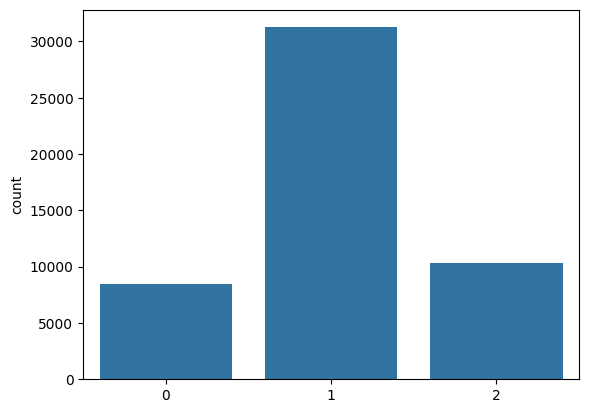

In [ ]:
sns.countplot(x=labels)

One bigger cluster... but overall, orders are well distributed.

n) Each KMeans cluster has a center (centroid).

You can get the values of the center for each cluster using the `.cluster_centers_` attribute on your KMeans object.

Create a DataFrame with each cluster's centroid values and the names of the features that the model has been trained on.

In [ ]:
# your code here
kmeans_2.cluster_centers_

array([[ 5.467218  ,  6.10322726, 91.26690097,  3.18802185],
       [11.02840081, 23.29766181,  4.78175812, 15.8833279 ],
       [90.1744576 , 11.86732292,  2.76672521,  5.52652144]])

o) What conclusions can you draw? What are the different order profiles that emerge?

<details>
    <summary><i>Solution</i></summary>

Remember that the values in each column are the relative coordinates for each centroid across the features. The greater the magnitude of a feature for a cluster, the more important that feature is to that cluster.

In the example above we can see 3 types of orders : 1 with mostly groceries, 1 with baby products and 1 that is more evenly distributed mainly mixing beauty and home products.
</details>

p) Add to `df` a new column label containing labels of each sample.

In [ ]:
# your code here

q) What does this instruction do? What can you say?

In [ ]:
df[df["promo_rate"] > 0].groupby("label").size() / df.groupby("label").size()

Where the promotion rate is greater than zero, we can see that the cluster we have associated with greater grocery turnover uses promotion codes more than others.